In [13]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

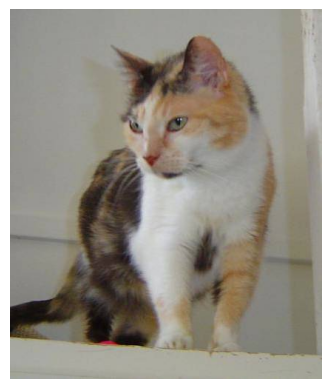

In [14]:
img = plt.imread('./training_set/cats/cat.130.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()


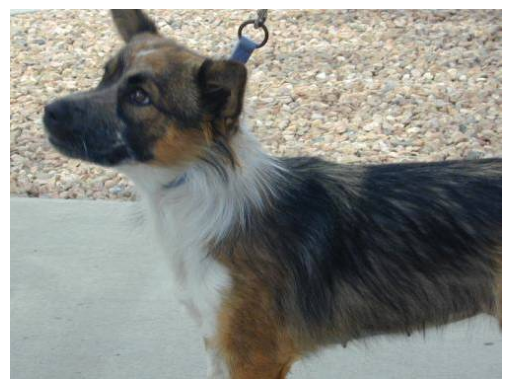

In [15]:
img = plt.imread('./training_set/dogs/dog.3.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()


---
<center><h1>Creating Dataset from Directory<h1><center>

In [16]:
batch_size = 32
img_height = 180
img_width = 180

In [17]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    './training_set/',
    validation_split=.2,
    subset="training",
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size)


Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [18]:
labels_train = ds_train.class_names
print(labels_train)

['cats', 'dogs']


In [19]:
ds_val = tf.keras.utils.image_dataset_from_directory(
    './training_set/',
    validation_split=.2,
    subset="validation",
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size)


Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [20]:
labels_val = ds_val.class_names
print(labels_val)

['cats', 'dogs']


In [28]:
num_classes = 2

In [29]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
   layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ['accuracy'])

In [32]:
epochs=10
history = model.fit(
  ds_train,
  validation_data=ds_val,
  epochs=epochs
)

Epoch 1/10
201/201 [==============================] - 65s 321ms/step - loss: 7.6341 - accuracy: 0.5012 - val_loss: 7.4960 - val_accuracy: 0.4916
Epoch 2/10
201/201 [==============================] - 64s 316ms/step - loss: 7.6508 - accuracy: 0.5019 - val_loss: 7.4960 - val_accuracy: 0.4916
Epoch 3/10
201/201 [==============================] - 61s 305ms/step - loss: 7.6508 - accuracy: 0.5019 - val_loss: 7.4960 - val_accuracy: 0.4916
Epoch 4/10
201/201 [==============================] - 61s 304ms/step - loss: 7.6508 - accuracy: 0.5019 - val_loss: 7.4960 - val_accuracy: 0.4916
Epoch 5/10
201/201 [==============================] - 62s 311ms/step - loss: 7.6508 - accuracy: 0.5019 - val_loss: 7.4960 - val_accuracy: 0.4916
Epoch 6/10
 79/201 [==========>...................] - ETA: 37s - loss: 7.6065 - accuracy: 0.4992

154/201 [=====================>........] - ETA: 14s - loss: 7.6030 - accuracy: 0.4988